### Modelling LLM and KMeans Hybrid Approach

#### Importing Libriaries

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import plotly.express as px
from sentence_transformers import SentenceTransformer

In [79]:
df = pd.read_csv("../data/customer_segmentation_data.csv")
df.drop(['id'],axis=1,inplace=True)

In [81]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,38,Female,99342,90,3,24,Groceries,113.53
1,21,Female,78852,60,2,42,Sports,41.93
2,60,Female,126573,30,2,28,Clothing,424.36
3,40,Other,47099,74,9,5,Home & Garden,991.93
4,65,Female,140621,21,3,25,Electronics,347.08


In [83]:
def compile_text(x):
    text =  f"""Gender: {x['gender']}, 
                Preferred Category {x['preferred_category']}
            """
    return text

In [85]:
sentences = df.apply(lambda x: compile_text(x), axis=1).tolist()

In [87]:
sentences

['Gender: Female, \n                Preferred Category Groceries\n            ',
 'Gender: Female, \n                Preferred Category Sports\n            ',
 'Gender: Female, \n                Preferred Category Clothing\n            ',
 'Gender: Other, \n                Preferred Category Home & Garden\n            ',
 'Gender: Female, \n                Preferred Category Electronics\n            ',
 'Gender: Other, \n                Preferred Category Home & Garden\n            ',
 'Gender: Other, \n                Preferred Category Clothing\n            ',
 'Gender: Male, \n                Preferred Category Groceries\n            ',
 'Gender: Male, \n                Preferred Category Sports\n            ',
 'Gender: Female, \n                Preferred Category Electronics\n            ',
 'Gender: Other, \n                Preferred Category Clothing\n            ',
 'Gender: Other, \n                Preferred Category Groceries\n            ',
 'Gender: Female, \n              

In [89]:
st = SentenceTransformer(r"sentence-transformers/paraphrase-MiniLM-L6-v2")
embeddings = st.encode(sentences=sentences, show_progress_bar=True, normalize_embeddings=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [90]:
df_embeddings = pd.DataFrame(embeddings)
df_embeddings

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.052275,-0.025477,-0.006212,0.019381,-0.033771,-0.016594,0.006749,-0.027776,0.003269,-0.046672,...,0.004243,-0.050573,0.029674,-0.017993,0.069679,0.052404,0.101748,-0.157556,0.023840,0.005222
1,0.084067,-0.000903,0.037379,-0.077742,-0.038312,0.073472,-0.014003,-0.022600,0.037301,0.084592,...,-0.044534,0.076409,-0.017212,-0.002858,-0.029757,0.022702,0.101982,-0.098227,0.014012,0.034434
2,0.061903,0.012150,0.046028,0.015185,-0.052947,0.030762,-0.006173,-0.064964,-0.018317,0.023220,...,-0.052917,-0.010085,-0.001091,0.019227,0.031406,0.101914,0.107618,-0.197385,-0.008965,0.014806
3,0.115420,-0.018330,0.058416,0.026040,-0.004600,-0.029541,-0.044684,-0.087542,-0.012681,0.055728,...,-0.013774,0.012968,0.046100,-0.015407,0.061259,0.051920,0.095926,-0.059882,-0.040237,0.054866
4,0.016269,-0.008216,0.004134,-0.061610,-0.040738,-0.015907,-0.012956,-0.007380,0.011973,0.011372,...,0.006612,-0.046804,0.048447,0.001760,-0.016964,0.088010,0.109031,-0.097196,0.026965,0.035285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.053451,0.041081,0.036489,0.007662,-0.060172,0.040980,0.006762,-0.068072,-0.015518,0.011283,...,-0.049903,-0.032371,-0.021855,0.034743,0.027433,0.083853,0.120910,-0.189170,-0.004008,0.027637
996,0.032952,-0.023379,-0.015563,0.030701,-0.010915,-0.025930,0.009029,-0.008044,0.010093,-0.066028,...,0.005100,-0.049103,0.044787,-0.015459,0.077776,0.055597,0.092498,-0.156696,0.023355,0.025387
997,0.074202,0.028488,0.014046,-0.109970,-0.047155,0.081888,-0.008948,-0.021482,0.037853,0.075784,...,-0.026066,0.053308,-0.038425,0.015797,-0.029339,-0.009776,0.122117,-0.090506,0.016297,0.045715
998,0.016269,-0.008216,0.004134,-0.061610,-0.040738,-0.015907,-0.012956,-0.007380,0.011973,0.011372,...,0.006612,-0.046804,0.048447,0.001760,-0.016964,0.088010,0.109031,-0.097196,0.026965,0.035285


In [93]:
df_new = pd.concat([df.drop(['gender','preferred_category'],axis=1),df_embeddings],axis=1)
df_new.columns = df_new.columns.astype(str)
df_new

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,0,1,2,3,...,374,375,376,377,378,379,380,381,382,383
0,38,99342,90,3,24,113.53,0.052275,-0.025477,-0.006212,0.019381,...,0.004243,-0.050573,0.029674,-0.017993,0.069679,0.052404,0.101748,-0.157556,0.023840,0.005222
1,21,78852,60,2,42,41.93,0.084067,-0.000903,0.037379,-0.077742,...,-0.044534,0.076409,-0.017212,-0.002858,-0.029757,0.022702,0.101982,-0.098227,0.014012,0.034434
2,60,126573,30,2,28,424.36,0.061903,0.012150,0.046028,0.015185,...,-0.052917,-0.010085,-0.001091,0.019227,0.031406,0.101914,0.107618,-0.197385,-0.008965,0.014806
3,40,47099,74,9,5,991.93,0.115420,-0.018330,0.058416,0.026040,...,-0.013774,0.012968,0.046100,-0.015407,0.061259,0.051920,0.095926,-0.059882,-0.040237,0.054866
4,65,140621,21,3,25,347.08,0.016269,-0.008216,0.004134,-0.061610,...,0.006612,-0.046804,0.048447,0.001760,-0.016964,0.088010,0.109031,-0.097196,0.026965,0.035285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,57,112170,57,6,1,313.64,0.053451,0.041081,0.036489,0.007662,...,-0.049903,-0.032371,-0.021855,0.034743,0.027433,0.083853,0.120910,-0.189170,-0.004008,0.027637
996,23,65337,76,10,23,632.83,0.032952,-0.023379,-0.015563,0.030701,...,0.005100,-0.049103,0.044787,-0.015459,0.077776,0.055597,0.092498,-0.156696,0.023355,0.025387
997,23,113097,40,5,42,75.09,0.074202,0.028488,0.014046,-0.109970,...,-0.026066,0.053308,-0.038425,0.015797,-0.029339,-0.009776,0.122117,-0.090506,0.016297,0.045715
998,22,113695,63,7,44,505.16,0.016269,-0.008216,0.004134,-0.061610,...,0.006612,-0.046804,0.048447,0.001760,-0.016964,0.088010,0.109031,-0.097196,0.026965,0.035285


In [99]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled)

In [101]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,380,381,382,383,384,385,386,387,388,389
0,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,-0.165207,-1.446002,-1.024799,0.854792,...,0.734760,-0.791217,0.530379,-1.286739,1.225544,-0.039830,-0.614775,-0.880933,0.767415,-1.969560
1,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,0.685669,-0.181050,0.703553,-1.093320,...,-1.094056,1.855153,-1.125458,-0.364610,-1.183810,-0.928069,-0.590599,0.404802,0.356245,-0.253112
2,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,0.092479,0.490837,1.046472,0.770644,...,-1.408326,0.052572,-0.556116,0.981017,0.298190,1.440797,-0.010121,-1.744053,-0.605091,-1.406421
3,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,1.524814,-1.078129,1.537666,0.988370,...,0.059234,0.533022,1.110508,-1.129167,1.021521,-0.054305,-1.214377,1.235785,-1.913500,0.947415
4,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,-1.128881,-0.557470,-0.614608,-0.769730,...,0.823560,-0.712661,1.193392,-0.083252,-0.873836,1.025005,0.135446,0.427144,0.898189,-0.203132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.879100,0.691806,0.218205,0.186035,-1.797910,-0.604570,-0.133731,1.980063,0.668261,0.619744,...,-1.295326,-0.411863,-1.289442,1.926358,0.201920,0.900662,1.358885,-1.566037,-0.397710,-0.652467
996,-1.382336,-0.677034,0.874720,1.587428,-0.252590,0.475247,-0.682367,-1.338006,-1.395575,1.081865,...,0.766869,-0.760566,1.064139,-1.132363,1.421732,0.055660,-1.567437,-0.862289,0.747161,-0.784686
997,-1.382336,0.718900,-0.369203,-0.164313,1.082005,-1.411583,0.421642,1.331835,-0.221576,-1.739763,...,-0.401617,1.373707,-1.874651,0.772023,-1.173687,-1.899353,1.483222,0.572116,0.451840,0.409736
998,-1.448849,0.736379,0.425525,0.536383,1.222489,0.043341,-1.128881,-0.557470,-0.614608,-0.769730,...,0.823560,-0.712661,1.193392,-0.083252,-0.873836,1.025005,0.135446,0.427144,0.898189,-0.203132


In [103]:
sns.set_style('whitegrid')
sns.set_palette('RdBu_r')
custom_palette = sns.color_palette('RdBu_r', n_colors=10)

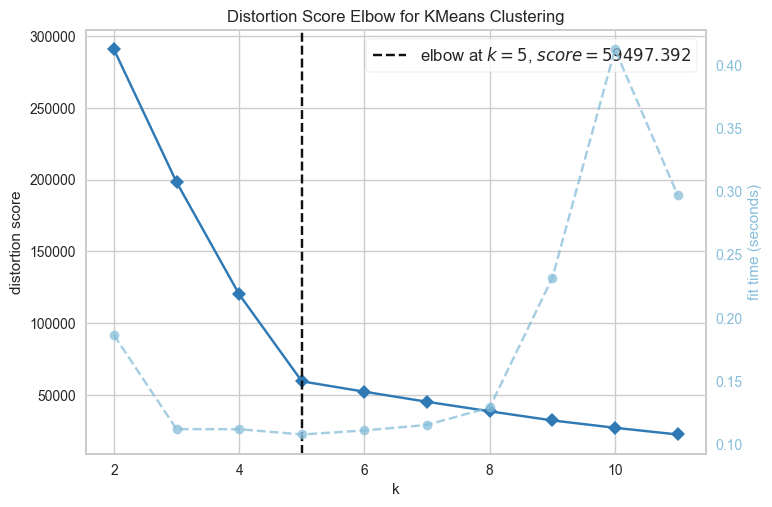

In [105]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,12))
 
visualizer.fit(df_scaled)
visualizer.show();

In [107]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_

    silhouette_avg.append(silhouette_score(df_scaled, cluster_labels))

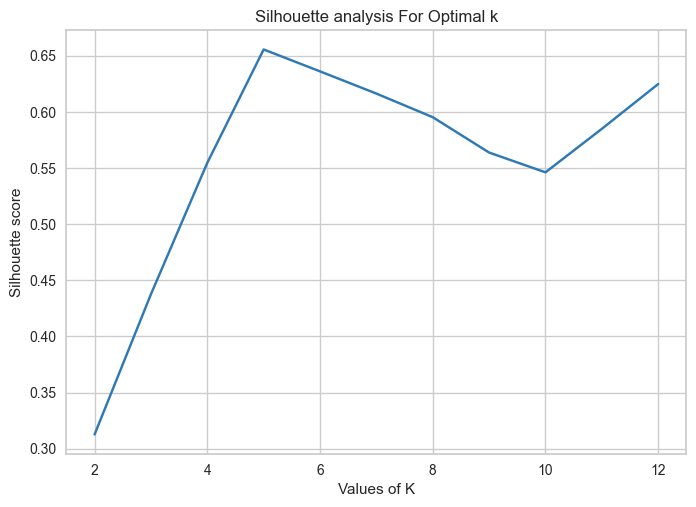

In [109]:
plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

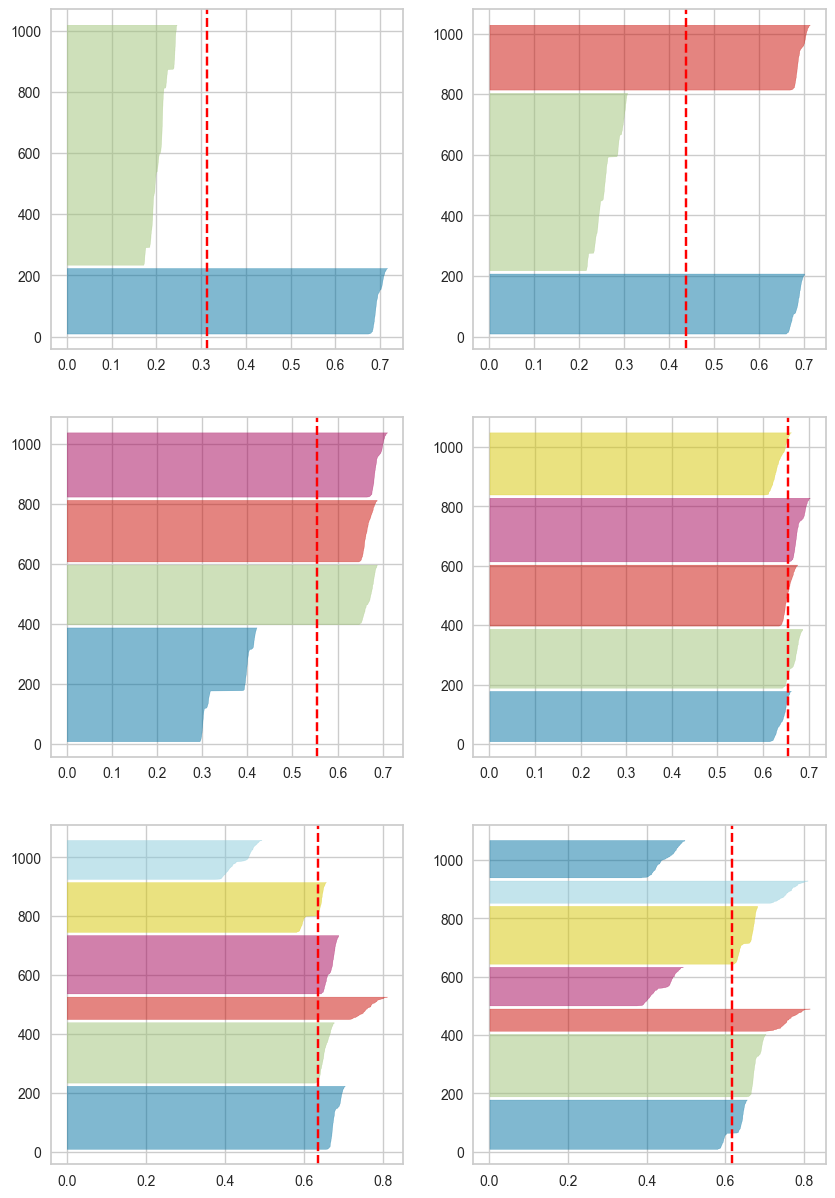

In [111]:
figa, ax = plt.subplots(3, 2, figsize=(10,15))
for i in [2,3,4,5,6,7]:
    kmean = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmean, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)

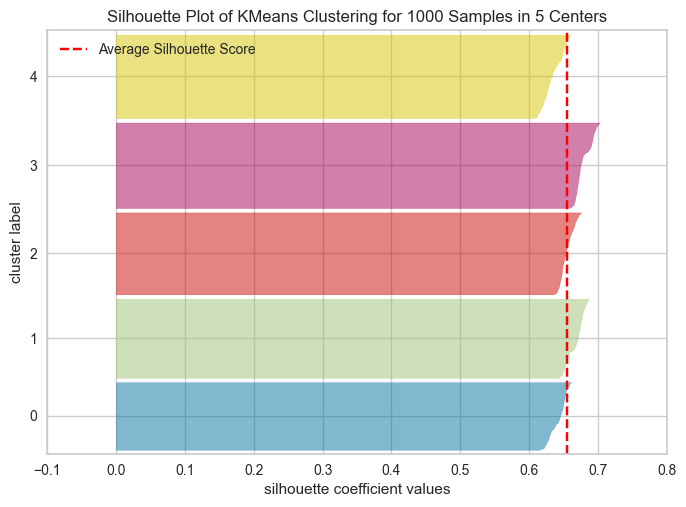

In [113]:
km = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show();

In [115]:
km.fit(df_scaled)
cluster_labels = km.labels_
clusters = pd.DataFrame(cluster_labels, columns=['cluster'])
clusters.head()

,cluster
0,1
1,4
2,0
3,2
4,3


In [129]:
df_seg = pd.concat([df_scaled,clusters], axis=1)
df_seg

,0,1,2,3,4,5,6,7,8,9,...,381,382,383,384,385,386,387,388,389,cluster
0,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,-0.165207,-1.446002,-1.024799,0.854792,...,-0.791217,0.530379,-1.286739,1.225544,-0.039830,-0.614775,-0.880933,0.767415,-1.969560,1
1,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,0.685669,-0.181050,0.703553,-1.093320,...,1.855153,-1.125458,-0.364610,-1.183810,-0.928069,-0.590599,0.404802,0.356245,-0.253112,4
2,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,0.092479,0.490837,1.046472,0.770644,...,0.052572,-0.556116,0.981017,0.298190,1.440797,-0.010121,-1.744053,-0.605091,-1.406421,0
3,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,1.524814,-1.078129,1.537666,0.988370,...,0.533022,1.110508,-1.129167,1.021521,-0.054305,-1.214377,1.235785,-1.913500,0.947415,2
4,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,-1.128881,-0.557470,-0.614608,-0.769730,...,-0.712661,1.193392,-0.083252,-0.873836,1.025005,0.135446,0.427144,0.898189,-0.203132,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.879100,0.691806,0.218205,0.186035,-1.797910,-0.604570,-0.133731,1.980063,0.668261,0.619744,...,-0.411863,-1.289442,1.926358,0.201920,0.900662,1.358885,-1.566037,-0.397710,-0.652467,0
996,-1.382336,-0.677034,0.874720,1.587428,-0.252590,0.475247,-0.682367,-1.338006,-1.395575,1.081865,...,-0.760566,1.064139,-1.132363,1.421732,0.055660,-1.567437,-0.862289,0.747161,-0.784686,1
997,-1.382336,0.718900,-0.369203,-0.164313,1.082005,-1.411583,0.421642,1.331835,-0.221576,-1.739763,...,1.373707,-1.874651,0.772023,-1.173687,-1.899353,1.483222,0.572116,0.451840,0.409736,4
998,-1.448849,0.736379,0.425525,0.536383,1.222489,0.043341,-1.128881,-0.557470,-0.614608,-0.769730,...,-0.712661,1.193392,-0.083252,-0.873836,1.025005,0.135446,0.427144,0.898189,-0.203132,3


In [131]:
pca = PCA(n_components=3, random_state=42)
pca_components = pca.fit_transform(df_seg.drop('cluster',axis=1))

In [135]:
df_seg['PCA_1'] = pca_components[:,0]
df_seg['PCA_2'] = pca_components[:,1]
df_seg['PCA_3'] = pca_components[:,2]

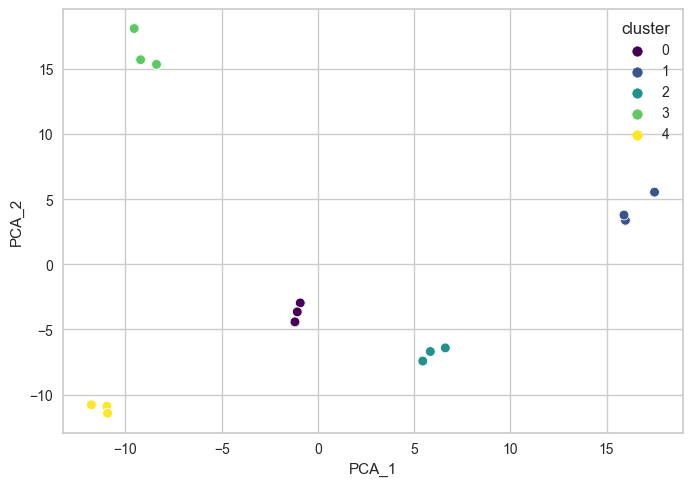

In [125]:
aa = sns.scatterplot(data=df_seg, x='PCA_1', y='PCA_2', hue='cluster', palette='viridis');

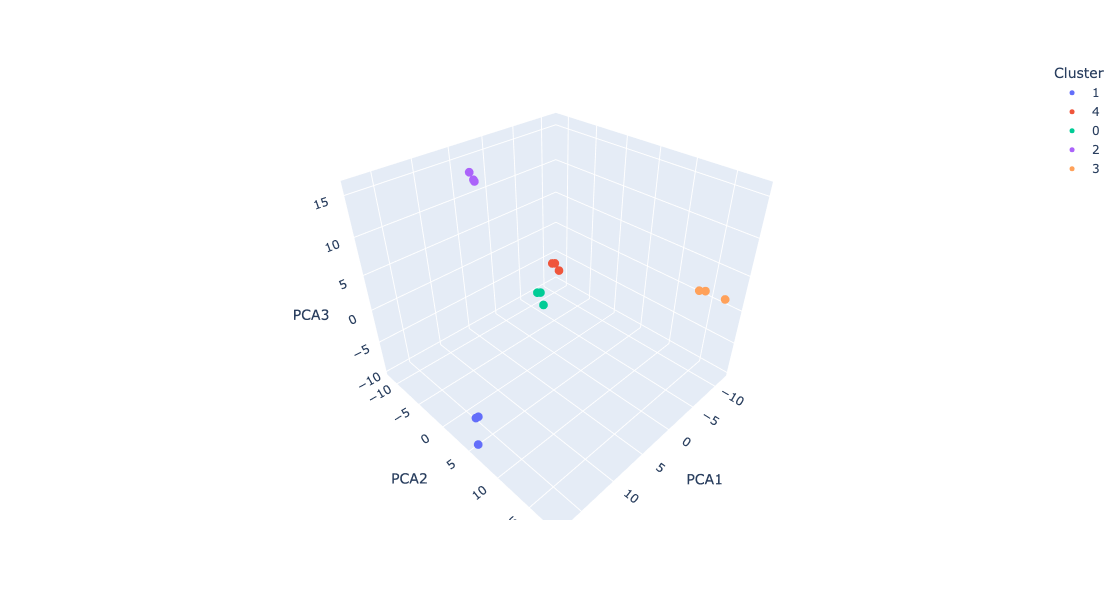

In [147]:
fig = px.scatter_3d(x=df_seg['PCA_1'],y=df_seg['PCA_2'],z=df_seg['PCA_3'],
                    color=df_seg['cluster'].astype(str),
                    labels={
                        'x':'PCA1',
                        'y':'PCA2',
                        'z':'PCA3'
                    },
                    template='plotly')
fig.update_layout(width=800,
                  height=600,
                  legend_title_text='Cluster')


fig.update_traces(marker=dict(size=5))
fig.show()

In [149]:
explained_variance_ratio = pca.explained_variance_ratio_
for indx, evr in enumerate(explained_variance_ratio):
    print(f"PC{indx+1}: {evr:.2f}")

PC1: 0.27
PC2: 0.26
PC3: 0.19


In [151]:
pca_results = pd.concat([pd.DataFrame(pca.explained_variance_,columns=['EigenValue']),pd.DataFrame(pca.explained_variance_ratio_,columns=['% of Variance'])],axis=1)
pca_results['% of variance (Cum)'] = pca_results['% of Variance'].cumsum()*100
pca_results

,EigenValue,% of Variance,% of variance (Cum)
0,105.650925,0.270629,27.062891
1,99.762034,0.255544,52.617320
2,73.403479,0.188026,71.419903


In [153]:
df_analysis = pd.concat([df,clusters], axis=1)

In [155]:
df_analysis

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,cluster
0,38,Female,99342,90,3,24,Groceries,113.53,1
1,21,Female,78852,60,2,42,Sports,41.93,4
2,60,Female,126573,30,2,28,Clothing,424.36,0
3,40,Other,47099,74,9,5,Home & Garden,991.93,2
4,65,Female,140621,21,3,25,Electronics,347.08,3
...,...,...,...,...,...,...,...,...,...
995,57,Male,112170,57,6,1,Clothing,313.64,0
996,23,Other,65337,76,10,23,Groceries,632.83,1
997,23,Male,113097,40,5,42,Sports,75.09,4
998,22,Female,113695,63,7,44,Electronics,505.16,3


In [161]:
df_group = df_analysis.groupby('cluster').agg(
    {
        'age': 'mean',
        'gender': lambda x: x.value_counts().index[0],
        'income': 'mean',
        'spending_score': 'mean',
        'membership_years': 'mean',
        'purchase_frequency':'mean',
        'preferred_category': lambda x: x.value_counts().index[0],
        'last_purchase_amount': 'mean',
        
    }
)
df_group

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
cluster,,,,,,,,
0,44.788235,Other,89350.011765,51.976471,5.500000,25.682353,Clothing,489.648412
1,43.793970,Male,87691.371859,51.256281,5.321608,27.160804,Groceries,487.279397
2,43.349515,Male,88900.514563,49.135922,5.223301,26.451456,Home & Garden,505.600631
3,43.079070,Male,89111.339535,50.297674,5.804651,26.427907,Electronics,496.632279
4,44.104762,Male,87563.195238,51.014286,5.480952,27.114286,Sports,481.953190


In [163]:
cluster_summary = df_analysis.groupby('cluster').agg({
    'age': ['min','mean','max'],
    'income': ['min','mean','max'],
    'spending_score': ['min','mean','max'],
    'purchase_frequency': ['min','mean','max'],
    'last_purchase_amount': ['min','mean','max']
})
cluster_summary

age                income                       spending_score  \
        min       mean max    min          mean     max            min   
cluster                                                                  
0        18  44.788235  69  30074  89350.011765  149062              1   
1        18  43.793970  69  30058  87691.371859  149973              1   
2        18  43.349515  69  30738  88900.514563  149741              1   
3        18  43.079070  69  30523  89111.339535  149723              1   
4        18  44.104762  69  30004  87563.195238  149505              1   

                        purchase_frequency                 \
              mean  max                min       mean max   
cluster                                                     
0        51.976471  100                  1  25.682353  50   
1        51.256281  100                  1  27.160804  50   
2        49.135922  100                  1  26.451456  50   
3        50.297674  100                  1  26.427907  50   
4        51.014286  100                  1  27.114286  50   

        last_purchase_amount                      
                         min        mean     max  
cluster                                           
0                      10.40  489.648412  997.24  
1                      11.01  487.279397  992.17  
2                      11.29  505.600631  999.74  
3                      13.16  496.632279  998.51  
4                      13.46  481.953190  998.98

In [165]:
cluster_distribution = df_analysis['cluster'].value_counts()
print(cluster_distribution)

cluster
3    215
4    210
2    206
1    199
0    170
Name: count, dtype: int64


In [167]:
pref_category_summary = df_analysis.groupby(['cluster', 'preferred_category']).size().unstack(fill_value=0)
pref_category_summary

preferred_category,Clothing,Electronics,Groceries,Home & Garden,Sports
cluster,,,,,
0,170,0,0,0,0
1,0,0,199,0,0
2,0,0,0,206,0
3,0,215,0,0,0
4,0,0,0,0,210


In [169]:
pref_category_proportions = pref_category_summary.div(pref_category_summary.sum(axis=1), axis=0)
pref_category_proportions

preferred_category,Clothing,Electronics,Groceries,Home & Garden,Sports
cluster,,,,,
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [171]:
gen_category_summary = df_analysis.groupby(['cluster', 'gender']).size().unstack(fill_value=0)
gen_category_summary

gender,Female,Male,Other
cluster,,,
0,56,56,58
1,66,71,62
2,68,77,61
3,65,76,74
4,61,77,72


In [173]:
gen_category_proportions = gen_category_summary.div(gen_category_summary.sum(axis=1), axis=0)
gen_category_proportions

gender,Female,Male,Other
cluster,,,
0,0.329412,0.329412,0.341176
1,0.331658,0.356784,0.311558
2,0.330097,0.373786,0.296117
3,0.302326,0.353488,0.344186
4,0.290476,0.366667,0.342857


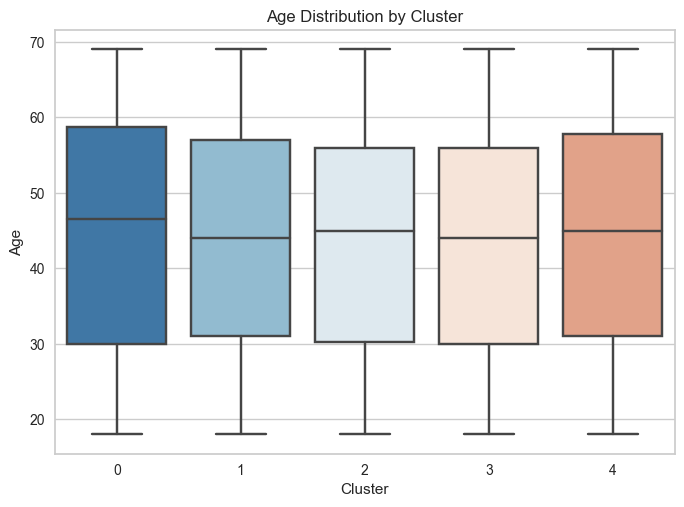

In [175]:
a = sns.boxplot(data=df_analysis, x='cluster', y='age')
a.set(xlabel='Cluster', ylabel='Age', title='Age Distribution by Cluster');

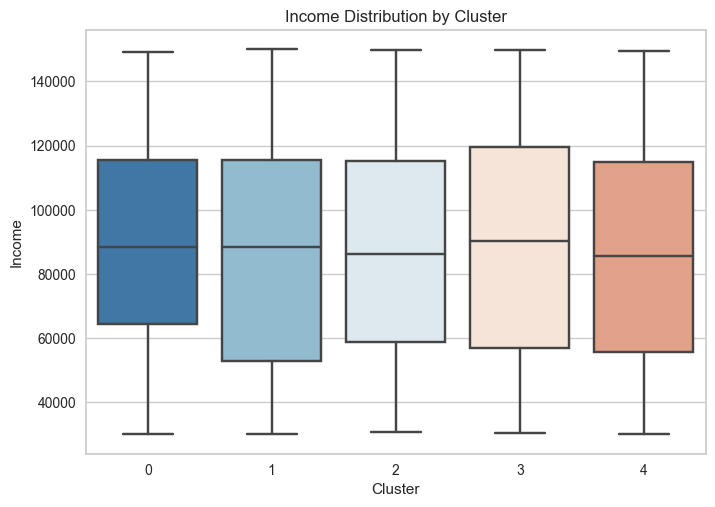

In [177]:
b = sns.boxplot(data=df_analysis, x='cluster', y='income')
b.set(xlabel='Cluster', ylabel='Income', title='Income Distribution by Cluster');

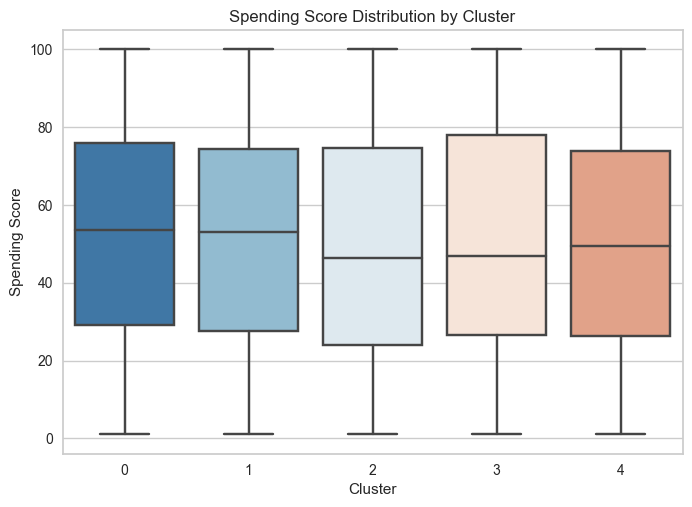

In [179]:
c = sns.boxplot(data=df_analysis, x='cluster', y='spending_score')
c.set(xlabel='Cluster', ylabel='Spending Score', title='Spending Score Distribution by Cluster');

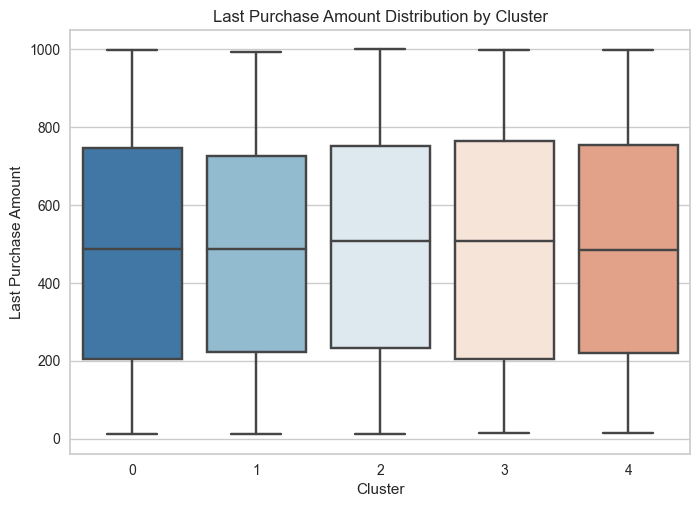

In [181]:
d = sns.boxplot(data=df_analysis, x='cluster', y='last_purchase_amount')
d.set(ylabel='Last Purchase Amount', xlabel='Cluster', title='Last Purchase Amount Distribution by Cluster');

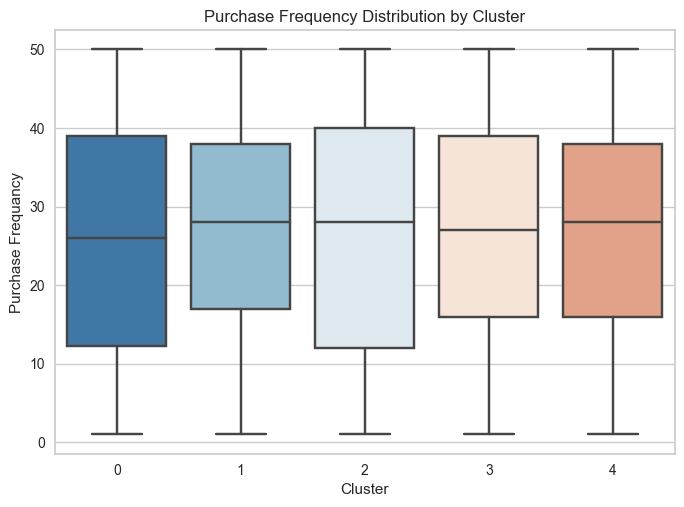

In [183]:
e = sns.boxplot(data=df_analysis, x='cluster', y='purchase_frequency')
e.set(xlabel='Cluster', ylabel='Purchase Frequancy', title='Purchase Frequency Distribution by Cluster');

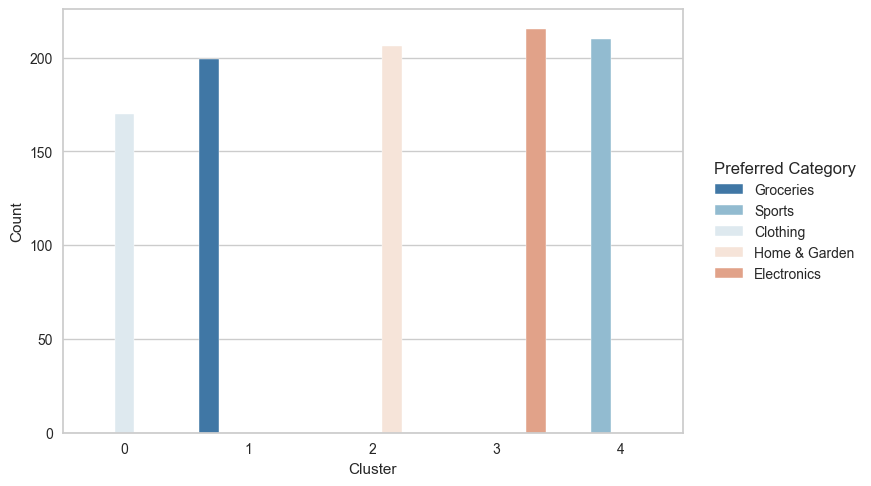

In [185]:
f = sns.countplot(data=df_analysis, hue='preferred_category', x='cluster')
f.set(xlabel = 'Cluster', ylabel='Count')
f.legend(title='Preferred Category', loc='center right', bbox_to_anchor=(1.3, 0.5));

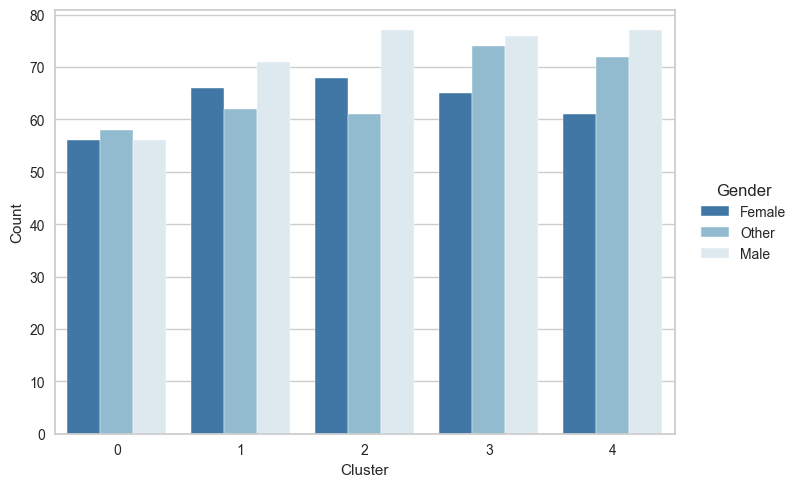

In [187]:
g = sns.countplot(data=df_analysis, hue='gender', x='cluster')
g.set(xlabel = 'Cluster', ylabel='Count')
g.legend(title='Gender', loc='center right', bbox_to_anchor=(1.2, 0.5));

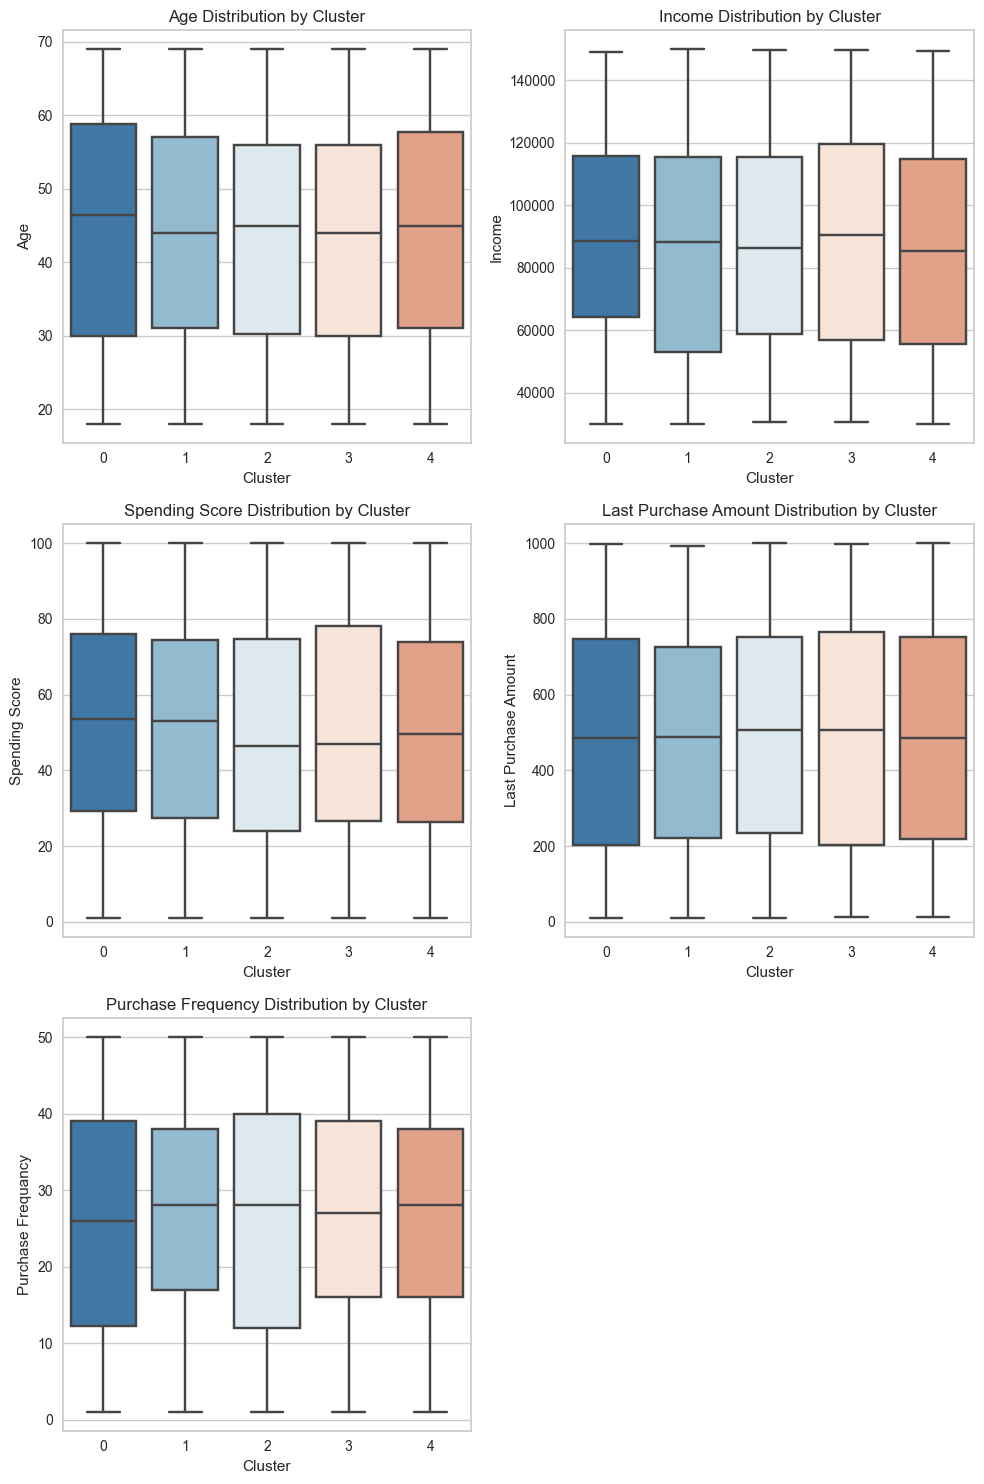

In [189]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.flatten() 

a = sns.boxplot(data=df_analysis, x='cluster', y='age', ax=axes[0])
a.set(xlabel='Cluster', ylabel='Age', title='Age Distribution by Cluster')
b = sns.boxplot(data=df_analysis, x='cluster', y='income', ax=axes[1])
b.set(xlabel='Cluster', ylabel='Income', title='Income Distribution by Cluster')
c = sns.boxplot(data=df_analysis, x='cluster', y='spending_score', ax=axes[2])
c.set(xlabel='Cluster', ylabel='Spending Score', title='Spending Score Distribution by Cluster')
d = sns.boxplot(data=df_analysis, x='cluster', y='last_purchase_amount', ax=axes[3])
d.set(ylabel='Last Purchase Amount', xlabel='Cluster', title='Last Purchase Amount Distribution by Cluster')
e = sns.boxplot(data=df_analysis, x='cluster', y='purchase_frequency', ax=axes[4])
e.set(xlabel='Cluster', ylabel='Purchase Frequancy', title='Purchase Frequency Distribution by Cluster')

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

In [191]:
df_group

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
cluster,,,,,,,,
0,44.788235,Other,89350.011765,51.976471,5.500000,25.682353,Clothing,489.648412
1,43.793970,Male,87691.371859,51.256281,5.321608,27.160804,Groceries,487.279397
2,43.349515,Male,88900.514563,49.135922,5.223301,26.451456,Home & Garden,505.600631
3,43.079070,Male,89111.339535,50.297674,5.804651,26.427907,Electronics,496.632279
4,44.104762,Male,87563.195238,51.014286,5.480952,27.114286,Sports,481.953190


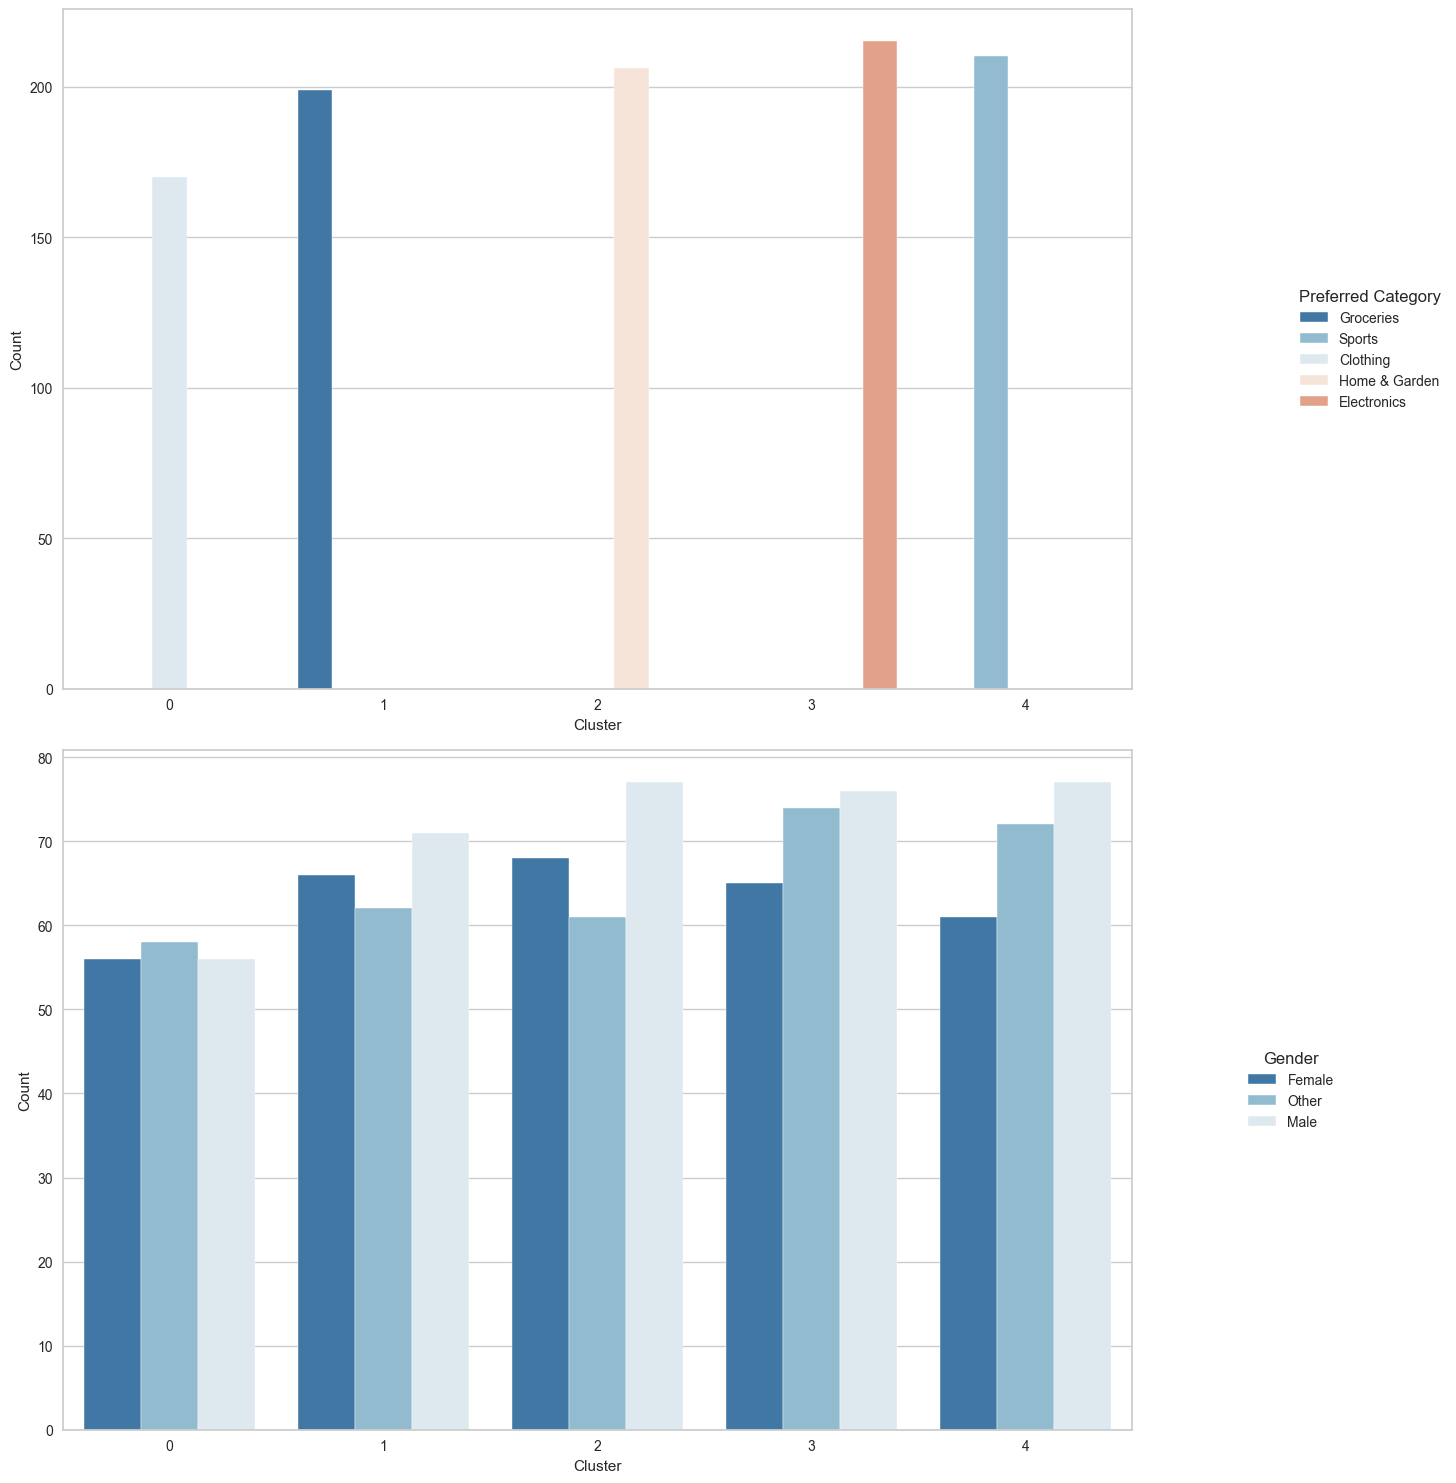

In [193]:
fig1, axes1 = plt.subplots(2, 1, figsize=(15, 15))
axes1 = axes1.flatten() 

f = sns.countplot(data=df_analysis, hue='preferred_category', x='cluster', ax=axes1[0])
f.set(xlabel = 'Cluster', ylabel='Count')
f.legend(title='Preferred Category', loc='center right', bbox_to_anchor=(1.3, 0.5))
g = sns.countplot(data=df_analysis, hue='gender', x='cluster', ax=axes1[1])
g.set(xlabel = 'Cluster', ylabel='Count')
g.legend(title='Gender', loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()
plt.show()